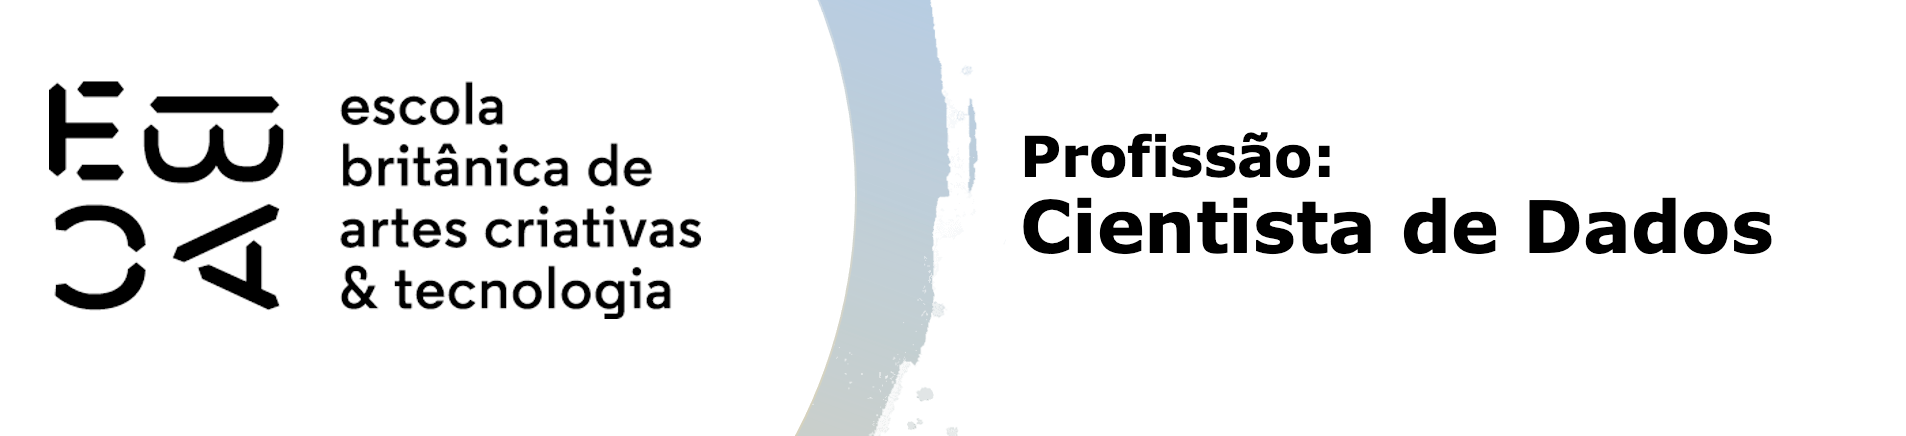

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [12]:
import pandas as pd

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Exibir as primeiras linhas do DataFrame
print(df.head())



    data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0 2015-01-01   5733    F                N               N           0   
1 2015-01-01    727    F                S               S           0   
2 2015-01-01   6374    F                N               N           2   
3 2015-01-01   9566    F                N               N           0   
4 2015-01-01   9502    F                S               N           0   

    tipo_renda             educacao estado_civil tipo_residencia  idade  \
0   Empresário                Médio     Solteiro            Casa     43   
1  Assalariado                Médio       Casado            Casa     35   
2  Assalariado                Médio       Casado            Casa     31   
3  Assalariado                Médio       Casado            Casa     54   
4  Assalariado  Superior incompleto     Solteiro            Casa     31   

   tempo_emprego  qt_pessoas_residencia     renda    mau  
0       6.873973                    1.0   2515.39  

## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [13]:
import pandas as pd

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Obter os três últimos meses de dados para validação OOT
ultimo_mes = df['data_ref'].max()
penultimo_mes = ultimo_mes - pd.DateOffset(months=1)
antepenultimo_mes = ultimo_mes - pd.DateOffset(months=2)

# Filtrar as safras OOT
oot_data = df[(df['data_ref'] == ultimo_mes) | (df['data_ref'] == penultimo_mes) | (df['data_ref'] == antepenultimo_mes)]

# Dados para modelagem
model_data = df[~df.index.isin(oot_data.index)]

# Verificar as formas dos dataframes
print("Dados para modelagem: ", model_data.shape)
print("Dados de validação OOT: ", oot_data.shape)

# Remover as variáveis data_ref e index
X_model = model_data.drop(columns=['data_ref', 'index', 'mau'])
y_model = model_data['mau']

X_oot = oot_data.drop(columns=['data_ref', 'index', 'mau'])
y_oot = oot_data['mau']

# Verificar as formas dos dataframes finais
print("X_model: ", X_model.shape)
print("y_model: ", y_model.shape)
print("X_oot: ", X_oot.shape)
print("y_oot: ", y_oot.shape)

# Exibir as primeiras linhas dos dataframes finais
print("Primeiras linhas do X_model:")
print(X_model.head())
print("Primeiras linhas do y_model:")
print(y_model.head())
print("Primeiras linhas do X_oot:")
print(X_oot.head())
print("Primeiras linhas do y_oot:")
print(y_oot.head())



Dados para modelagem:  (600000, 15)
Dados de validação OOT:  (150000, 15)
X_model:  (600000, 12)
y_model:  (600000,)
X_oot:  (150000, 12)
y_oot:  (150000,)
Primeiras linhas do X_model:
  sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0    F                N               N           0   Empresário   
1    F                S               S           0  Assalariado   
2    F                N               N           2  Assalariado   
3    F                N               N           0  Assalariado   
4    F                S               N           0  Assalariado   

              educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0                Médio     Solteiro            Casa     43       6.873973   
1                Médio       Casado            Casa     35       4.526027   
2                Médio       Casado            Casa     31       0.243836   
3                Médio       Casado            Casa     54      12.772603   
4  Superior incomplet

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [14]:
import pandas as pd

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Descrição do número total de linhas
total_linhas = df.shape[0]
print(f"Total de linhas: {total_linhas}")

# Número de linhas para cada mês em data_ref
linhas_por_mes = df['data_ref'].value_counts().sort_index()
print("\nNúmero de linhas para cada mês em data_ref:")
print(linhas_por_mes)

# Descritiva básica univariada para variáveis qualitativas e quantitativas
qualitativas = df.select_dtypes(include=['object', 'bool'])
quantitativas = df.select_dtypes(include=['number'])

# Descritiva básica para variáveis qualitativas
print("\nDescritiva básica para variáveis qualitativas:")
for coluna in qualitativas.columns:
    print(f"\n{coluna}:")
    print(qualitativas[coluna].value_counts())
    print(qualitativas[coluna].value_counts(normalize=True))

# Descritiva básica para variáveis quantitativas
print("\nDescritiva básica para variáveis quantitativas:")
print(quantitativas.describe())


Total de linhas: 750000

Número de linhas para cada mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Descritiva básica para variáveis qualitativas:

sexo:
sexo
F    504580
M    245420
Name: count, dtype: int64
sexo
F    0.672773
M    0.327227
Name: proportion, dtype: float64

posse_de_veiculo:
posse_de_veiculo
N    457954
S    292046
Name: count, dtype: int64
posse_de_veiculo
N    0.610605
S    0.389395
Name: proportion, dtype: float64

posse_de_imovel:
posse_de_imovel
S    503692
N    246308
Name: count, dtype: int64
posse_de_imovel
S    0.671589
N    0.328411
Name: proportion, dtype: float64

tipo_renda:
tipo_renda
Assalariado         385740
Empresário          172712
Pensionista      

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável


Análise bivariada para variáveis qualitativas:

sexo:
mau    False  True 
sexo               
F     463950  40630
M     227407  18013
mau      False     True 
sexo                    
F     0.919478  0.080522
M     0.926603  0.073397


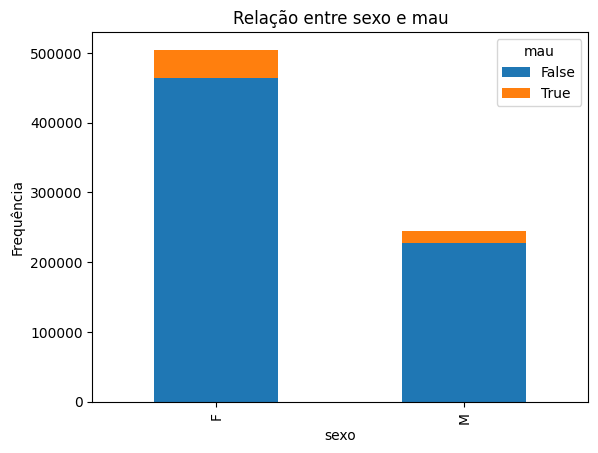


posse_de_veiculo:
mau                False  True 
posse_de_veiculo               
N                 421872  36082
S                 269485  22561
mau                  False     True 
posse_de_veiculo                    
N                 0.921210  0.078790
S                 0.922748  0.077252


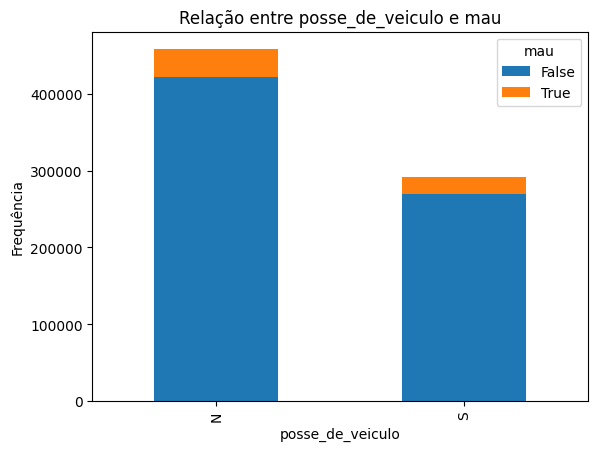


posse_de_imovel:
mau               False  True 
posse_de_imovel               
N                224515  21793
S                466842  36850
mau                 False     True 
posse_de_imovel                    
N                0.911521  0.088479
S                0.926840  0.073160


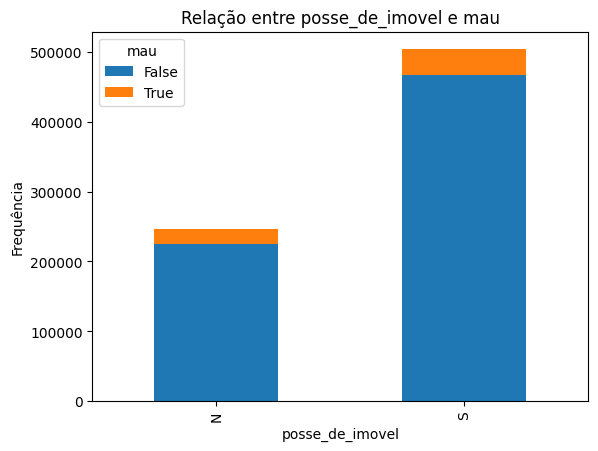


tipo_renda:
mau                False  True 
tipo_renda                     
Assalariado       354527  31213
Bolsista             346     15
Empresário        159508  13204
Pensionista       115825  10440
Servidor público   61151   3771
mau                  False     True 
tipo_renda                          
Assalariado       0.919083  0.080917
Bolsista          0.958449  0.041551
Empresário        0.923549  0.076451
Pensionista       0.917317  0.082683
Servidor público  0.941915  0.058085


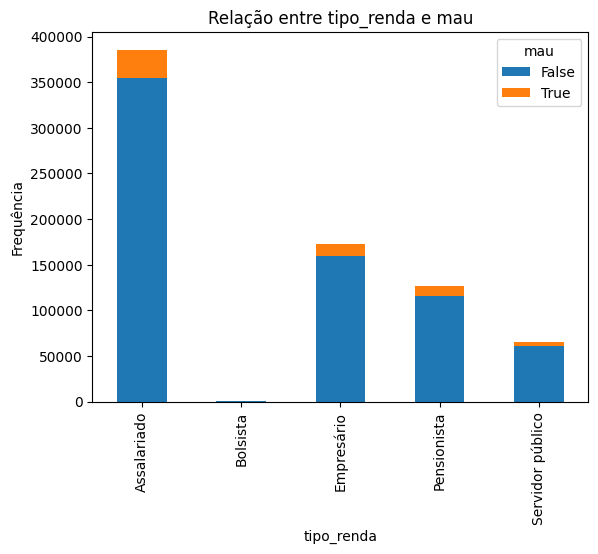


educacao:
mau                   False  True 
educacao                          
Fundamental            7789    786
Médio                466106  40730
Pós graduação           753     59
Superior completo    189684  14622
Superior incompleto   27025   2446
mau                     False     True 
educacao                               
Fundamental          0.908338  0.091662
Médio                0.919639  0.080361
Pós graduação        0.927340  0.072660
Superior completo    0.928431  0.071569
Superior incompleto  0.917003  0.082997


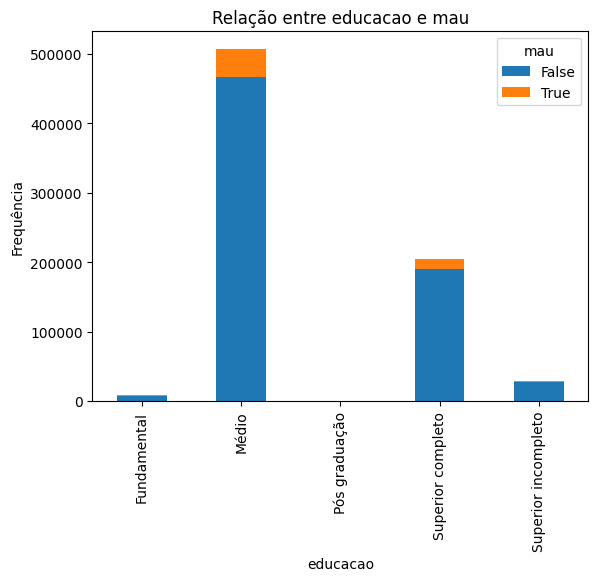


estado_civil:
mau            False  True 
estado_civil               
Casado        485953  40519
Separado       39090   3481
Solteiro       84214   7445
União          52846   4839
Viúvo          29254   2359
mau              False     True 
estado_civil                    
Casado        0.923037  0.076963
Separado      0.918231  0.081769
Solteiro      0.918775  0.081225
União         0.916113  0.083887
Viúvo         0.925379  0.074621


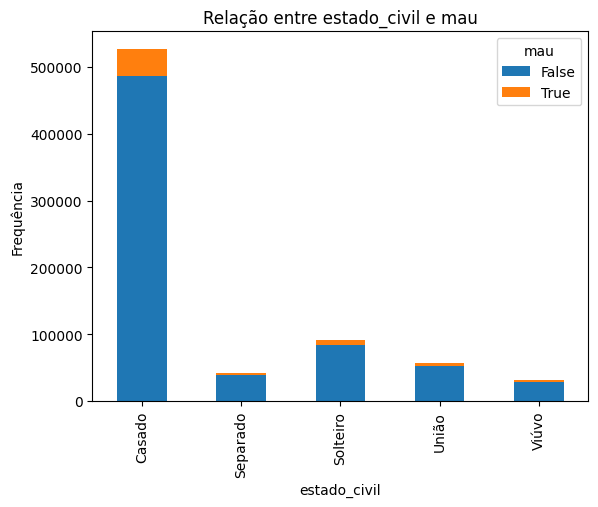


tipo_residencia:
mau               False  True 
tipo_residencia               
Aluguel            9416    933
Casa             622288  52006
Com os pais       30086   3146
Comunitário        3012    278
Estúdio            5042    353
Governamental     21513   1927
mau                 False     True 
tipo_residencia                    
Aluguel          0.909846  0.090154
Casa             0.922873  0.077127
Com os pais      0.905332  0.094668
Comunitário      0.915502  0.084498
Estúdio          0.934569  0.065431
Governamental    0.917790  0.082210


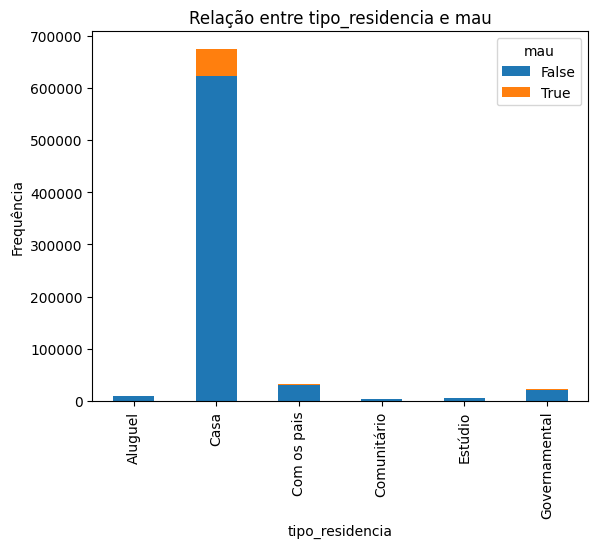


Análise bivariada para variáveis quantitativas:

index:
          count         mean          std  min     25%     50%      75%  \
mau                                                                       
False  691357.0  8306.162185  4807.121939  0.0  4138.0  8301.0  12467.0   
True    58643.0  8473.837031  4832.032003  0.0  4285.5  8601.0  12692.0   

           max  
mau             
False  16649.0  
True   16649.0  


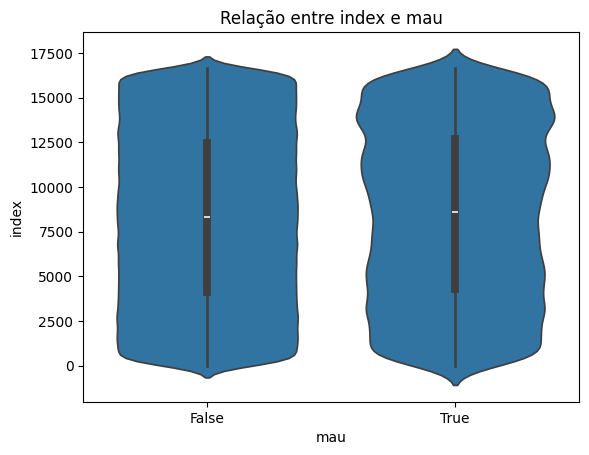


qtd_filhos:
          count      mean       std  min  25%  50%  75%   max
mau                                                          
False  691357.0  0.431739  0.737456  0.0  0.0  0.0  1.0  14.0
True    58643.0  0.451068  0.761465  0.0  0.0  0.0  1.0  14.0


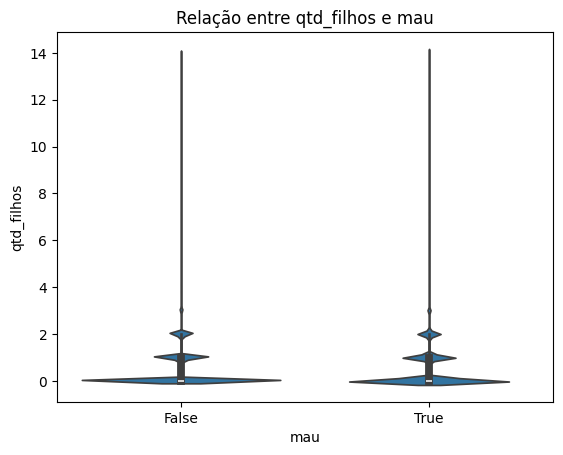


idade:
          count       mean        std   min   25%   50%   75%   max
mau                                                                
False  691357.0  43.896274  11.193997  22.0  35.0  43.0  53.0  68.0
True    58643.0  42.725543  11.590152  22.0  33.0  41.0  52.0  68.0


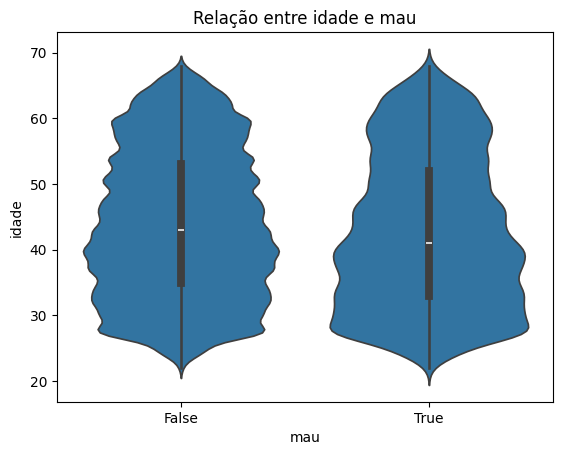


tempo_emprego:
          count      mean       std       min       25%       50%        75%  \
mau                                                                            
False  575806.0  8.004300  6.807303  0.117808  3.219178  6.345205  10.556164   
True    48237.0  4.695965  3.913739  0.117808  1.715068  3.854795   6.621918   

             max  
mau               
False  42.906849  
True   42.906849  


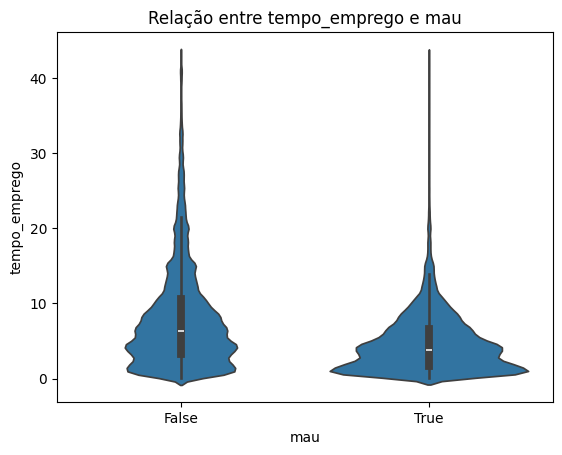


qt_pessoas_residencia:
          count      mean       std  min  25%  50%  75%   max
mau                                                          
False  691357.0  2.211221  0.901365  1.0  2.0  2.0  3.0  15.0
True    58643.0  2.224272  0.927327  1.0  2.0  2.0  3.0  15.0


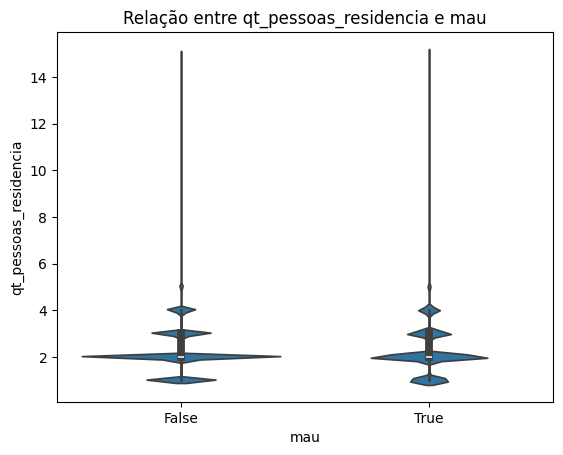


renda:
          count          mean           std     min       25%      50%  \
mau                                                                      
False  691357.0  24804.689618  82154.474316  113.36  3896.300  8602.87   
True    58643.0   4774.871007   9612.302738  107.67  1301.785  2507.28   

            75%         max  
mau                          
False  19688.06  4083986.22  
True    5133.16   989799.47  


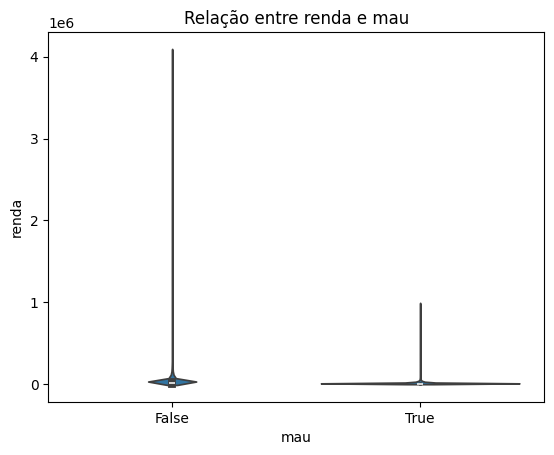


Correlação entre variáveis quantitativas e mau:
index                    0.009360
qtd_filhos               0.007018
idade                   -0.027989
tempo_emprego           -0.132118
qt_pessoas_residencia    0.003878
renda                   -0.067978
dtype: float64


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Separar variáveis qualitativas e quantitativas
qualitativas = df.select_dtypes(include=['object', 'bool'])
quantitativas = df.select_dtypes(include=['number'])

# Variáveis explicativas
variaveis = df.columns.drop(['data_ref', 'index', 'mau'])

# Análise bivariada para variáveis qualitativas
print("\nAnálise bivariada para variáveis qualitativas:")
for coluna in qualitativas.columns:
    if coluna != 'mau':
        print(f"\n{coluna}:")
        crosstab = pd.crosstab(df[coluna], df['mau'])
        crosstab_normalized = crosstab.div(crosstab.sum(1), axis=0)
        print(crosstab)
        print(crosstab_normalized)
        
        # Gráfico de barras empilhadas
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f'Relação entre {coluna} e mau')
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
        plt.legend(title='mau')
        plt.show()

# Análise bivariada para variáveis quantitativas
print("\nAnálise bivariada para variáveis quantitativas:")
for coluna in quantitativas.columns:
    if coluna != 'mau':
        print(f"\n{coluna}:")
        # Estatísticas descritivas agrupadas por mau
        group_stats = df.groupby('mau')[coluna].describe()
        print(group_stats)
        
        # Gráfico de violino para visualizar a distribuição
        sns.violinplot(x='mau', y=coluna, data=df)
        plt.title(f'Relação entre {coluna} e mau')
        plt.xlabel('mau')
        plt.ylabel(coluna)
        plt.show()

# Correlação entre variáveis quantitativas e a variável mau
correlacoes = quantitativas.corrwith(df['mau'])
print("\nCorrelação entre variáveis quantitativas e mau:")
print(correlacoes)


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

Valores ausentes por coluna:
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64
Valores ausentes após imputação:
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64


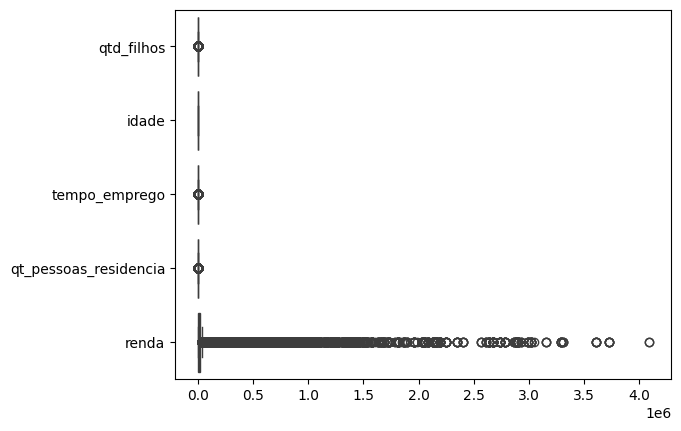

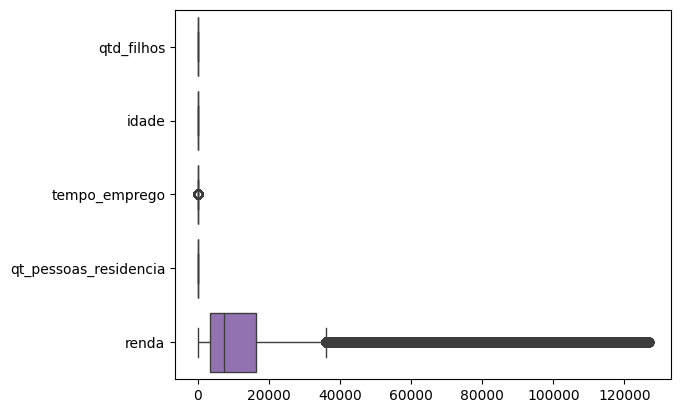

Classification Report:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.92      1.00      0.96    196154
        True       0.00      0.00      0.00     17459

    accuracy                           0.92    213613
   macro avg       0.46      0.50      0.48    213613
weighted avg       0.84      0.92      0.88    213613

Confusion Matrix:
[[196154      0]
 [ 17459      0]]
ROC AUC Score:
0.7700483724322402
Coeficientes do modelo:
qtd_filhos                       0.007388
idade                            0.003196
tempo_emprego                   -0.122897
qt_pessoas_residencia           -0.007131
renda                           -2.449437
sexo_F                           0.026648
sexo_M                          -0.026648
posse_de_veiculo_N              -0.004960
posse_de_veiculo_S               0.004960
posse_de_imovel_N                0.021764
posse_de_imovel_S               -0.021764
tipo_renda_Assalariado           0.013463
tipo_renda_Bolsista             -0.002243
tipo_renda_Empre

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[196154      0]
 [ 17459      0]]
ROC AUC Score (Variáveis Significantes):
0.7701634160691062


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Remover colunas não utilizadas
df = df.drop(columns=['data_ref', 'index'])

# Tratamento de Dados
## Identificação e Imputação de Valores Ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))
df[df.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(df.select_dtypes(include=[object]))

print("Valores ausentes após imputação:")
print(df.isnull().sum())

## Identificação e Remoção de Outliers
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.show()

def remove_outliers(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df = df[(df[column] >= mean - 3*std) & (df[column] <= mean + 3*std)]
    return df

num_cols = df.select_dtypes(include=[np.number]).columns
df = remove_outliers(df, num_cols)

sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.show()

## Tratamento de Zeros Estruturais
df['renda'] = df['renda'].replace(0, np.nan)
df['renda'] = num_imputer.fit_transform(df[['renda']])

## Agrupamento de Categorias
def agrupar_categorias(df, coluna, frequencia_minima):
    frequencias = df[coluna].value_counts()
    categorias_menos_frequentes = frequencias[frequencias < frequencia_minima].index
    df[coluna] = df[coluna].replace(categorias_menos_frequentes, 'Outros')
    return df

for col in df.select_dtypes(include=[object]).columns:
    df = agrupar_categorias(df, col, frequencia_minima=100)

# Divisão dos Dados em Treino e Teste
X = df.drop(columns=['mau'])
y = df['mau']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Codificação de Variáveis Categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Garantir que ambas as divisões possuem as mesmas colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Modelagem
## Pipeline para Padronização e Regressão Logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Treinamento do Modelo
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Avaliação do Modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))

# Obter e Avaliar Coeficientes do Modelo
model = pipeline.named_steps['logreg']
coeficientes = pd.Series(model.coef_[0], index=X_train.columns)
print("Coeficientes do modelo:")
print(coeficientes)

# Remoção de Variáveis Não Significantes
variaveis_significantes = coeficientes[coeficientes.abs() > 0.01].index
X_train_significantes = X_train[variaveis_significantes]
X_test_significantes = X_test[variaveis_significantes]

# Treinamento do Modelo com Variáveis Significantes
pipeline.fit(X_train_significantes, y_train)

# Previsões com Variáveis Significantes
y_pred_significantes = pipeline.predict(X_test_significantes)
y_pred_prob_significantes = pipeline.predict_proba(X_test_significantes)[:, 1]

# Nova Avaliação do Modelo
print("Classification Report (Variáveis Significantes):")
print(classification_report(y_test, y_pred_significantes))
print("Confusion Matrix (Variáveis Significantes):")
print(confusion_matrix(y_test, y_pred_significantes))
print("ROC AUC Score (Variáveis Significantes):")
print(roc_auc_score(y_test, y_pred_prob_significantes))




## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

Valores ausentes por coluna:
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64
Valores ausentes após imputação:
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64


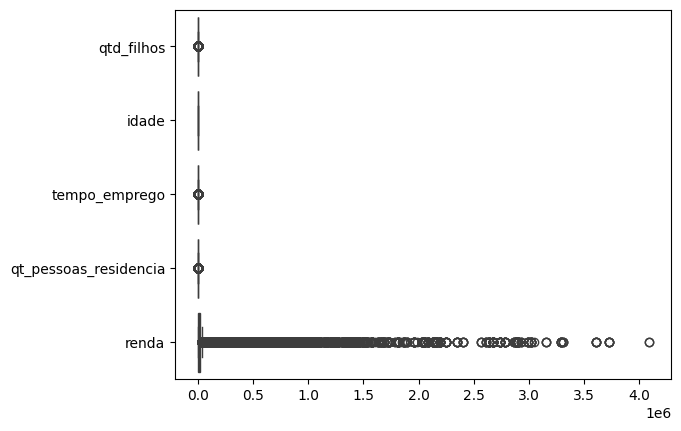

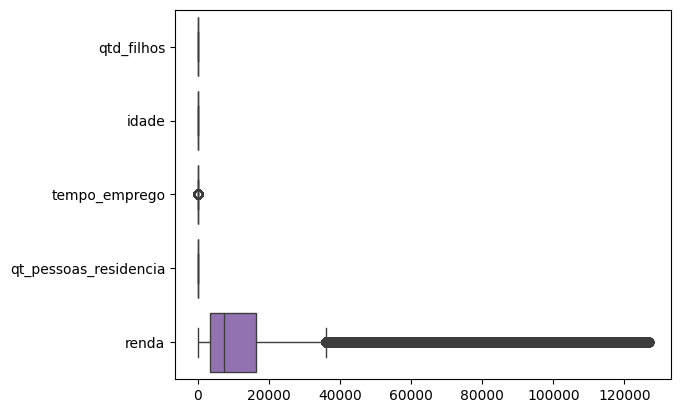

Métricas de Avaliação na Base de Desenvolvimento:
Acurácia (Desenvolvimento): 0.9192121646212399
KS (Desenvolvimento): 0.002926119851789033
Gini (Desenvolvimento): 0.24707076543880763

Métricas de Avaliação na Base Out-of-Time:
Acurácia (Out-of-Time): 0.9182680829350274
KS (Out-of-Time): 0.0048607060412432235
Gini (Out-of-Time): 0.24797915989961258


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Carregar e Pré-processar os Dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Remover colunas não utilizadas
df = df.drop(columns=['data_ref', 'index'])

# Tratamento de Dados
## Identificação e Imputação de Valores Ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[df.select_dtypes(include=[np.number]).columns] = num_imputer.fit_transform(df.select_dtypes(include=[np.number]))
df[df.select_dtypes(include=[object]).columns] = cat_imputer.fit_transform(df.select_dtypes(include=[object]))

print("Valores ausentes após imputação:")
print(df.isnull().sum())

## Identificação e Remoção de Outliers
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.show()

def remove_outliers(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df = df[(df[column] >= mean - 3*std) & (df[column] <= mean + 3*std)]
    return df

num_cols = df.select_dtypes(include=[np.number]).columns
df = remove_outliers(df, num_cols)

sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.show()

## Tratamento de Zeros Estruturais
df['renda'] = df['renda'].replace(0, np.nan)
df['renda'] = num_imputer.fit_transform(df[['renda']])

## Agrupamento de Categorias
def agrupar_categorias(df, coluna, frequencia_minima):
    frequencias = df[coluna].value_counts()
    categorias_menos_frequentes = frequencias[frequencias < frequencia_minima].index
    df[coluna] = df[coluna].replace(categorias_menos_frequentes, 'Outros')
    return df

for col in df.select_dtypes(include=[object]).columns:
    df = agrupar_categorias(df, col, frequencia_minima=100)

# Divisão dos Dados em Treino e Teste
X = df.drop(columns=['mau'])
y = df['mau']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Codificação de Variáveis Categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Garantir que ambas as divisões possuem as mesmas colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Modelagem
## Pipeline para Padronização e Regressão Logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Treinamento do Modelo
pipeline.fit(X_train, y_train)

# Previsões
y_train_pred_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Avaliação do Modelo
## Calcular KS
def ks_score(y_true, y_score):
    sorted_scores = np.sort(y_score)
    n = len(sorted_scores)
    events = sum(y_true)
    non_events = len(y_true) - events
    cum_event_rate = np.cumsum(y_true) / events
    cum_non_event_rate = np.cumsum(1 - y_true) / non_events
    ks = max(abs(cum_event_rate - cum_non_event_rate))
    return ks

ks_dev = ks_score(y_train, y_train_pred_prob)
ks_oot = ks_score(y_test, y_test_pred_prob)

## Calcular Gini
def gini_score(y_true, y_score):
    n = len(y_true)
    order = np.argsort(y_score)[::-1]
    y_true_sorted = y_true.iloc[order]
    cumulative_gini = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    cumulative_random = np.linspace(0, 1, n)
    gini = np.sum(cumulative_gini - cumulative_random) / n
    return gini

gini_dev = gini_score(y_train, y_train_pred_prob)
gini_oot = gini_score(y_test, y_test_pred_prob)

## Acurácia
accuracy_dev = pipeline.score(X_train, y_train)
accuracy_oot = pipeline.score(X_test, y_test)

print("Métricas de Avaliação na Base de Desenvolvimento:")
print("Acurácia (Desenvolvimento):", accuracy_dev)
print("KS (Desenvolvimento):", ks_dev)
print("Gini (Desenvolvimento):", gini_dev)

print("\nMétricas de Avaliação na Base Out-of-Time:")
print("Acurácia (Out-of-Time):", accuracy_oot)
print("KS (Out-of-Time):", ks_oot)
print("Gini (Out-of-Time):", gini_oot)




## Criar um pipeline utilizando o sklearn pipeline 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Remover colunas não utilizadas
df = df.drop(columns=['data_ref', 'index'])

# Dividir os dados em treino e teste
X = df.drop(columns=['mau'])
y = df['mau']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir pré-processamento para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Definir pré-processamento para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar pré-processamento para todas as colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=[np.number]).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)])

# Criar pipeline com pré-processamento e modelo de regressão logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação (Treino):")
print(classification_report(y_train, y_train_pred))

print("Relatório de Classificação (Teste):")
print(classification_report(y_test, y_test_pred))


Relatório de Classificação (Treino):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.92      1.00      0.96    484062
        True       0.00      0.00      0.00     40938

    accuracy                           0.92    525000
   macro avg       0.46      0.50      0.48    525000
weighted avg       0.85      0.92      0.88    525000

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       False       0.92      1.00      0.96    207295
        True       0.00      0.00      0.00     17705

    accuracy                           0.92    225000
   macro avg       0.46      0.50      0.48    225000
weighted avg       0.85      0.92      0.88    225000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-pa

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [19]:
import pandas as pd

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Remover colunas não utilizadas
df = df.drop(columns=['data_ref', 'index'])

# Verificar se existem valores nulos na base de dados
valores_nulos = df.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

# Determinar o tipo de substituição para valores nulos
for coluna, qtd_nulos in valores_nulos.items():
    if qtd_nulos > 0:
        tipo_dado = df[coluna].dtype
        if tipo_dado == 'object':
            substituto = df[coluna].mode()[0]  # Valor mais frequente para dados categóricos
        else:
            substituto = df[coluna].median()   # Mediana para dados numéricos
        print(f"Coluna '{coluna}': tipo {tipo_dado}, substituto: {substituto}")


Valores nulos por coluna:
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64
Coluna 'tempo_emprego': tipo float64, substituto: 6.046575342465753


### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [20]:
import pandas as pd
import numpy as np

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Remover colunas não utilizadas
df = df.drop(columns=['data_ref', 'index'])

# Remover colunas não numéricas
df_numeric = df.select_dtypes(include=['number'])

# Identificar outliers usando a regra do IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

# Contar outliers por coluna
outliers_count = outliers.sum()
print("Quantidade de outliers por coluna:\n", outliers_count)

# Definir um limite para substituição pela mediana
limite = 0.01 * len(df)  # Substituir se mais de 1% dos valores forem outliers

# Substituir outliers pela mediana nas colunas com muitos outliers
for column in df_numeric.columns:
    if outliers_count[column] > limite:
        median_value = df_numeric[column].median()
        df.loc[outliers[column], column] = median_value

# Recalcular a identificação de outliers após substituição
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

# Remover linhas com outliers nas colunas com poucos outliers
df_sem_outliers = df[~outliers.any(axis=1)]

# Verificar a quantidade de outliers removidos
qtd_outliers_removidos = (~outliers).all(axis=1).sum()
print("Quantidade de outliers removidos:", qtd_outliers_removidos)

# Nota explicativa
print("""
Optamos por substituir outliers em colunas onde o número de outliers ultrapassa 1% do total de linhas,
substituindo-os pela mediana dessa coluna. Essa abordagem permite preservar a integridade do dataset,
evitando a remoção excessiva de dados. Nas colunas com poucos outliers, removemos as linhas correspondentes.
""")





Quantidade de outliers por coluna:
 qtd_filhos               10016
idade                        0
tempo_emprego            34561
qt_pessoas_residencia     9629
renda                    79072
dtype: int64
Quantidade de outliers removidos: 654067

Optamos por substituir outliers em colunas onde o número de outliers ultrapassa 1% do total de linhas,
substituindo-os pela mediana dessa coluna. Essa abordagem permite preservar a integridade do dataset,
evitando a remoção excessiva de dados. Nas colunas com poucos outliers, removemos as linhas correspondentes.



### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np
from sklearn.utils import check_random_state

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Verificar as colunas presentes no DataFrame
print(df.columns)

# Remover a coluna de datas
df = df.drop(columns=['data_ref'])

# Selecione a coluna alvo correta
y = df['mau']

# Remover a coluna alvo dos dados de entrada
X = df.drop(columns=['mau'])

# Tratar valores ausentes
for column in X.columns:
    if X[column].dtype == 'object':  # Para colunas categóricas
        X[column] = X[column].fillna(X[column].mode()[0])
    else:  # Para colunas numéricas
        X[column] = X[column].fillna(X[column].median())

# Converter variáveis categóricas em dummies/indicadores
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o estimador RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Patch temporário no BorutaPy para substituir np.int por int
def patched_fit_func(self, X, y):
    self._check_params(X, y)
    self.random_state = check_random_state(self.random_state)
    n_feat = X.shape[1]
    _iter = 1
    dec_reg = np.zeros(n_feat, dtype=int)  # Substituído np.int por int
    hit_reg = np.zeros(n_feat, dtype=int)  # Substituído np.int por int

    while True:
        self.estimator.set_params(**self.estimator.get_params())
        self.estimator.fit(X, y)
        imp = self.estimator.feature_importances_
        imp_sha_max = np.percentile(imp, 100 * (1 - self.perc / 100.0))
        dec_reg += np.where(imp > imp_sha_max, 1, -1)

        # Termination conditions
        if self._check_termination(_iter, dec_reg):
            break

        _iter += 1

    self.dec_reg = dec_reg
    self.support_ = dec_reg > 0  # Adicionado suporte para variáveis selecionadas
    return self

def patched_check_termination(self, _iter, dec_reg):
    max_iter = self.max_iter
    if max_iter is None:
        max_iter = 1000

    if _iter >= max_iter:
        return True
    if np.all(dec_reg != 0):
        return True
    return False

BorutaPy._fit = patched_fit_func
BorutaPy._check_termination = patched_check_termination

# Inicializar o Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

# Executar o Boruta
boruta.fit(X_train.values, y_train.values)

# Verificar as variáveis selecionadas
selected_features = X_train.columns[boruta.support_]
print("Variáveis selecionadas pelo Boruta:", selected_features)









Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')
Variáveis selecionadas pelo Boruta: Index(['index', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'sexo_M', 'posse_de_veiculo_S',
       'posse_de_imovel_S', 'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Médio', 'educacao_Superior completo',
       'educacao_Superior incompleto', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental'],
      dtype='object')


### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Verificar as colunas presentes no DataFrame
print(df.columns)

# Remover a coluna de datas
df = df.drop(columns=['data_ref'])

# Selecione a coluna alvo correta
y = df['mau']

# Remover a coluna alvo dos dados de entrada
X = df.drop(columns=['mau'])

# Tratar valores ausentes
for column in X.columns:
    if X[column].dtype == 'object':  # Para colunas categóricas
        X[column] = X[column].fillna(X[column].mode()[0])
    else:  # Para colunas numéricas
        X[column] = X[column].fillna(X[column].median())

# Converter variáveis categóricas em dummies/indicadores
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o estimador RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Patch temporário no BorutaPy para substituir np.int por int
def patched_fit_func(self, X, y):
    self._check_params(X, y)
    self.random_state = check_random_state(self.random_state)
    n_feat = X.shape[1]
    _iter = 1
    dec_reg = np.zeros(n_feat, dtype=int)  # Substituído np.int por int
    hit_reg = np.zeros(n_feat, dtype=int)  # Substituído np.int por int

    while True:
        self.estimator.set_params(**self.estimator.get_params())
        self.estimator.fit(X, y)
        imp = self.estimator.feature_importances_
        imp_sha_max = np.percentile(imp, 100 * (1 - self.perc / 100.0))
        dec_reg += np.where(imp > imp_sha_max, 1, -1)

        # Termination conditions
        if self._check_termination(_iter, dec_reg):
            break

        _iter += 1

    self.dec_reg = dec_reg
    self.support_ = dec_reg > 0  # Adicionado suporte para variáveis selecionadas
    return self

def patched_check_termination(self, _iter, dec_reg):
    max_iter = self.max_iter
    if max_iter is None:
        max_iter = 1000

    if _iter >= max_iter:
        return True
    if np.all(dec_reg != 0):
        return True
    return False

BorutaPy._fit = patched_fit_func
BorutaPy._check_termination = patched_check_termination

# Inicializar o Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

# Executar o Boruta
boruta.fit(X_train.values, y_train.values)

# Verificar as variáveis selecionadas
selected_features = X_train.columns[boruta.support_]
print("Variáveis selecionadas pelo Boruta:", selected_features)

# Reduzir a dimensionalidade com PCA para 5 componentes principais
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train[selected_features])
X_test_pca = pca.transform(X_test[selected_features])

print("Forma do conjunto de treinamento após PCA:", X_train_pca.shape)
print("Forma do conjunto de teste após PCA:", X_test_pca.shape)






Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')
Variáveis selecionadas pelo Boruta: Index(['index', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'sexo_M', 'posse_de_veiculo_S',
       'posse_de_imovel_S', 'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Médio', 'educacao_Superior completo',
       'educacao_Superior incompleto', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental'],
      dtype='object')
Forma do conjunto de treinamento após PCA: (60000

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [23]:
import pandas as pd

# Carregar a base de dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Selecionar as colunas categóricas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Converter as colunas categóricas em dummies
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Exibir as primeiras linhas do DataFrame para verificar a transformação
print(df.head())


    data_ref  index  qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia  \
0 2015-01-01   5733           0     43       6.873973                    1.0   
1 2015-01-01    727           0     35       4.526027                    2.0   
2 2015-01-01   6374           2     31       0.243836                    4.0   
3 2015-01-01   9566           0     54      12.772603                    2.0   
4 2015-01-01   9502           0     31       8.432877                    1.0   

      renda    mau  sexo_M  posse_de_veiculo_S  ...  \
0   2515.39  False   False               False  ...   
1   3180.19  False   False                True  ...   
2   1582.29  False   False               False  ...   
3  13721.17  False   False               False  ...   
4   2891.08  False   False                True  ...   

   educacao_Superior incompleto  estado_civil_Separado  estado_civil_Solteiro  \
0                         False                  False                   True   
1                         

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar o arquivo .ftr
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Verificar se os dados foram carregados corretamente
print(df.head())

# Dividir os dados em features (X) e target (y)
X = df.drop(columns=['mau'])
y = df['mau']

# Definir as colunas categóricas e numéricas
categorical_cols = ['posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
numerical_cols = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# Verificar se as colunas foram selecionadas corretamente
print("Colunas categóricas:", categorical_cols)
print("Colunas numéricas:", numerical_cols)

# Definir pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Definir pré-processamento para colunas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))])

# Combina os pré-processadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Criar o pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar o pipeline aos dados
X_processed = pipeline.fit_transform(X)

# Verificar a forma dos dados após o pré-processamento
print("Shape dos dados após o pré-processamento:", X_processed.shape)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Verificar se a divisão foi feita corretamente
print("Shape dos conjuntos de treinamento e teste:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)




      








    data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0 2015-01-01   5733    F                N               N           0   
1 2015-01-01    727    F                S               S           0   
2 2015-01-01   6374    F                N               N           2   
3 2015-01-01   9566    F                N               N           0   
4 2015-01-01   9502    F                S               N           0   

    tipo_renda             educacao estado_civil tipo_residencia  idade  \
0   Empresário                Médio     Solteiro            Casa     43   
1  Assalariado                Médio       Casado            Casa     35   
2  Assalariado                Médio       Casado            Casa     31   
3  Assalariado                Médio       Casado            Casa     54   
4  Assalariado  Superior incompleto     Solteiro            Casa     31   

   tempo_emprego  qt_pessoas_residencia     renda    mau  
0       6.873973                    1.0   2515.39  

### Treinar um modelo de regressão logistica com o resultado

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar e treinar o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = logistic_model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de regressão logística:", accuracy)


Acurácia do modelo de regressão logística: 0.9220266666666667


### Salvar o pickle file do modelo treinado

In [26]:
import pickle

nome_arquivo = 'modelo_final.pkl'
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(logistic_model, arquivo)


# Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [ ]:
from pycaret.classification import *

# Inicialize o ambiente PyCaret
exp_clf = setup(data=df, target='mau')

# Compare diferentes modelos
best_model = compare_models()

# Crie o modelo LightGBM
lgbm_model = create_model('lightgbm')

# Tune o modelo LightGBM
tuned_lgbm_model = tune_model(lgbm_model)

# Avalie o modelo
evaluate_model(tuned_lgbm_model)

# Salve o modelo treinado
save_model(tuned_lgbm_model, 'modelo_lightgbm_final')



,Description,Value
0,Session id,1941
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 15)"
4,Transformed data shape,"(750000, 34)"
5,Transformed train set shape,"(525000, 34)"
6,Transformed test set shape,"(225000, 34)"
7,Numeric features,6
8,Date features,1
9,Categorical features,7


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:18:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9218,0.4982,0.0000,0.0000,0.0000,0.0000,0.0000,3.4260


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.

In [5]:
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Loading example dataset
iris = load_iris()
X, y = iris.data, iris.target

# Training the model
model = RandomForestClassifier()
model.fit(X, y)

# Saving the trained model
joblib.dump(model, 'model_final.pkl')


['model_final.pkl']

In [6]:
%%writefile streamlit_app.py

import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Function to load the trained model
@st.cache_resource
def load_model():
    model = joblib.load('model_final.pkl')
    return model

# Function to preprocess the data
def preprocess_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to make predictions
def make_predictions(model, data):
    predictions = model.predict(data)
    return predictions

# Streamlit interface
def main():
    st.title("Scoring Application with Streamlit")
    
    uploaded_file = st.file_uploader("Choose a CSV file for scoring", type="csv")
    
    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)
        st.write("Data for scoring:")
        st.write(data)
        
        # Preprocess the data
        preprocessed_data = preprocess_data(data)
        
        # Load the model and make predictions
        model = load_model()
        predictions = make_predictions(model, preprocessed_data)
        
        st.write("Predictions:")
        st.write(predictions)

if __name__ == "__main__":
    main()


Writing streamlit_app.py


In [ ]:
!streamlit run streamlit_app1.py
